In [1]:
from results import *
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
from matplotlib.transforms import Affine2D

In [2]:
sns.set()

In [3]:
def extract_data(label, data_dict, denominator_dict, normalize):
    mean_list = list()
    std_list = list()
    if normalize:
        factor = denominator_dict[label]
    else:
        factor = 1
    for iter_nb in range(5):
        mean_list.append(data_dict[iter_nb][label]['mean']/factor)
        std_list.append(data_dict[iter_nb][label]['sem']/factor)
    return mean_list, std_list

In [4]:
def extract_data_new(label, data_dict, denominator_dict, normalize):
    mean_list = list()
    std_list = list()
    if normalize:
        factor = denominator_dict[label]
    else:
        factor = 1
    for iter_nb in range(4):
        mean_list.append(data_dict[iter_nb][label]['numerator']/factor)
        std_list.append(data_dict[iter_nb][label]['sem']/factor)
    if 4 in data_dict.keys():
        mean_list.append(data_dict[4][label]['numerator']/factor)
        std_list.append(data_dict[4][label]['sem']/factor)
    return mean_list, std_list

In [5]:
labels=['is_hired_1mo', 'is_unemployed', 'job_offer', 'job_search', 'lost_job_1mo']

In [6]:
output_path = '/home/manuto/Documents/world_bank/bert_twitter_labor/twitter-labor-data/data/fig/expansion'

In [7]:
iter_nb = range(5)

## Old

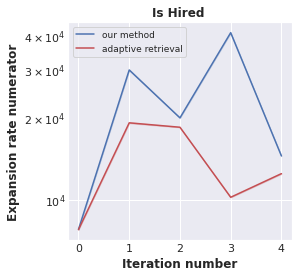

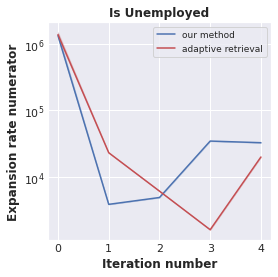

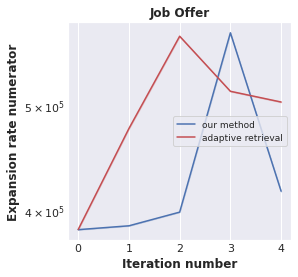

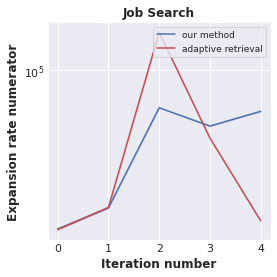

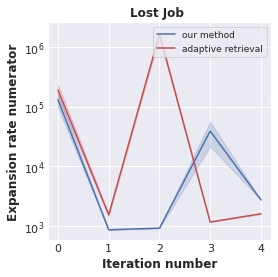

In [9]:
for label in labels:
    fig,ax = plt.subplots(figsize=(4,4))
    mean_list_our_method, std_list_our_method = extract_data(label, our_method_dict, denominator_dict, normalize=False)
    mean_list_adaptive, std_list_adaptive = extract_data(label, adaptive_dict, denominator_dict, normalize=False)
    ax.plot(iter_nb, mean_list_our_method, 'b-', label='our method')
    ax.fill_between(iter_nb, list(np.array(mean_list_our_method) - np.array(std_list_our_method)), list(np.array(mean_list_our_method) + np.array(std_list_our_method)), color='b', alpha=0.2)
    ax.plot(iter_nb, mean_list_adaptive, 'r-', label='adaptive retrieval')
    ax.fill_between(iter_nb, list(np.array(mean_list_adaptive) - np.array(std_list_adaptive)), list(np.array(mean_list_adaptive) + np.array(std_list_adaptive)), color='r', alpha=0.2)
    ax.set_yscale('log')
    ax.tick_params(which='both',direction='in',pad=3)
#     ax.locator_params(axis='y',nbins=6)
    ax.set_ylabel('Expansion rate numerator',fontweight='bold')
    ax.set_xlabel('Iteration number',fontweight='bold')
    ax.set_title(label.replace('_',' ').replace('1mo','').title(),fontweight='bold')
    ax.legend(loc='best',fontsize=9)
    plt.savefig(os.path.join(output_path,f'numerator_{label}.png'),bbox_inches='tight', format='png' ,dpi=1200, transparent=False)

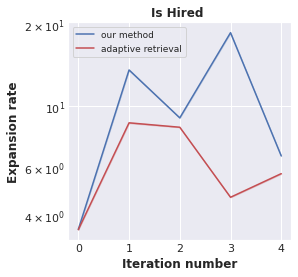

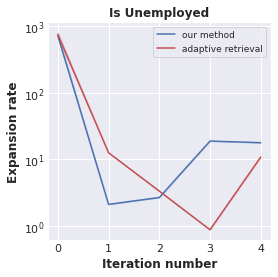

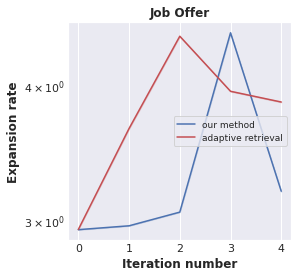

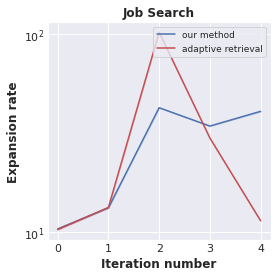

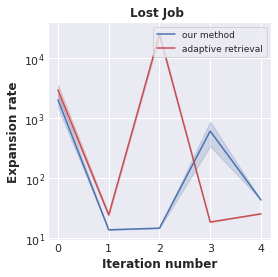

In [11]:
for label in labels:
    fig,ax = plt.subplots(figsize=(4,4))
    mean_list_our_method, std_list_our_method = extract_data(label, our_method_dict, denominator_dict, normalize=True)
    mean_list_adaptive, std_list_adaptive = extract_data(label, adaptive_dict, denominator_dict, normalize=True)
    ax.plot(iter_nb, mean_list_our_method, 'b-', label='our method')
    ax.fill_between(iter_nb, list(np.array(mean_list_our_method) - np.array(std_list_our_method)), list(np.array(mean_list_our_method) + np.array(std_list_our_method)), color='b', alpha=0.2)
    ax.plot(iter_nb, mean_list_adaptive, 'r-', label='adaptive retrieval')
    ax.fill_between(iter_nb, list(np.array(mean_list_adaptive) - np.array(std_list_adaptive)), list(np.array(mean_list_adaptive) + np.array(std_list_adaptive)), color='r', alpha=0.2)
    ax.set_yscale('log')
    ax.tick_params(which='both',direction='in',pad=3)
#     ax.locator_params(axis='y',nbins=6)
    ax.set_ylabel('Expansion rate',fontweight='bold')
    ax.set_xlabel('Iteration number',fontweight='bold')
    ax.set_title(label.replace('_',' ').replace('1mo','').title(),fontweight='bold')
    ax.legend(loc='best',fontsize=9)
    plt.savefig(os.path.join(output_path,f'{label}.png'),bbox_inches='tight', format='png' ,dpi=1200, transparent=False)

## New

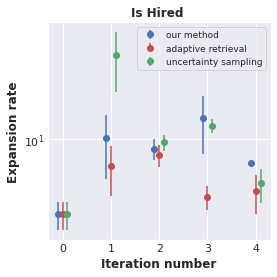

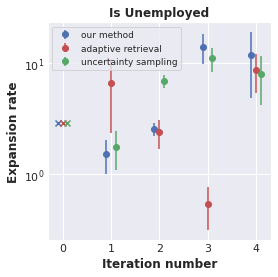

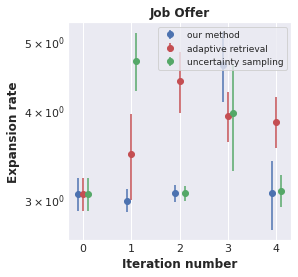

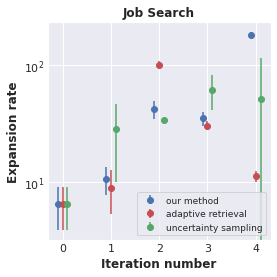

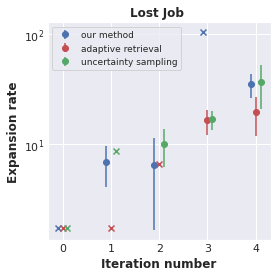

In [10]:
for label in labels:
    fig,ax = plt.subplots(figsize=(4,4))
    mean_list_our_method, std_list_our_method = extract_data_new(label, our_method_new_dict, denominator_dict, normalize=True)
    mean_list_adaptive, std_list_adaptive = extract_data_new(label, adaptive_new_dict, denominator_dict, normalize=True)
    mean_list_uncertainty, std_list_uncertainty = extract_data_new(label, uncertainty_new_dict, denominator_dict, normalize=True)
    trans1 = Affine2D().translate(-0.1, 0.0) + ax.transData
    trans2 = Affine2D().translate(+0.1, 0.0) + ax.transData
    if label == 'is_unemployed':
        ax.scatter(0, mean_list_our_method[0], c='b', marker='x', transform=trans1)
        ax.errorbar(range(1,5), mean_list_our_method[1:], std_list_our_method[1:], linestyle='None', marker='o', transform=trans1, label='our method')
        ax.scatter(0, mean_list_adaptive[0], c='r', marker='x')
        ax.errorbar(range(1,5), mean_list_adaptive[1:], std_list_adaptive[1:], linestyle='None', marker='o', label='adaptive retrieval', c='r')
        ax.scatter(0, mean_list_uncertainty[0], c='g', marker='x', transform=trans2)
        ax.errorbar(range(1,5), mean_list_uncertainty[1:], std_list_uncertainty[1:], linestyle='None', marker='o', label='uncertainty sampling', c='g', transform=trans2)
    elif label == 'lost_job_1mo':
        ax.scatter([0,3], [mean_list_our_method[0], mean_list_our_method[3]] , c='b', marker='x', transform=trans1)
        ax.errorbar([1,2,4], [mean_list_our_method[1], mean_list_our_method[2], mean_list_our_method[4]], [std_list_our_method[1], std_list_our_method[2], std_list_our_method[4]], linestyle='None', marker='o', transform=trans1, label='our method', c='b')
        ax.scatter([0,1,2], [mean_list_adaptive[0], mean_list_adaptive[1], mean_list_adaptive[2]], c='r', marker='x')
        ax.errorbar([3,4], [ mean_list_adaptive[3], mean_list_adaptive[4]], [std_list_adaptive[3], std_list_adaptive[4]], linestyle='None', marker='o', label='adaptive retrieval', c='r')
        ax.scatter([0,1], [mean_list_uncertainty[0],mean_list_uncertainty[1]], c='g', marker='x', transform=trans2)
        ax.errorbar([2,3, 4], [mean_list_uncertainty[2],mean_list_uncertainty[3], mean_list_uncertainty[4]] , [std_list_uncertainty[2],std_list_uncertainty[3], std_list_uncertainty[4]], linestyle='None', marker='o', label='uncertainty sampling', transform=trans2, c='g')
    else:
        #ax.scatter(iter_nb, mean_list_our_method, c='b', label='our method')
        ax.errorbar(iter_nb, mean_list_our_method, std_list_our_method, linestyle='None', marker='o', transform=trans1, label='our method', c='b')
    #     ax.fill_between(iter_nb, list(np.array(mean_list_our_method) - np.array(std_list_our_method)), list(np.array(mean_list_our_method) + np.array(std_list_our_method)), color='b', alpha=0.2)
        #ax.scatter(iter_nb, mean_list_adaptive, c='r', label='adaptive retrieval')
        ax.errorbar(iter_nb, mean_list_adaptive, std_list_adaptive, linestyle='None', marker='o', label='adaptive retrieval', c='r')
    #     ax.fill_between(iter_nb, list(np.array(mean_list_adaptive) - np.array(std_list_adaptive)), list(np.array(mean_list_adaptive) + np.array(std_list_adaptive)), color='r', alpha=0.2)
        #ax.scatter(range(4), mean_list_uncertainty, c='g', label='uncertainty sampling')
        ax.errorbar(iter_nb, mean_list_uncertainty, std_list_uncertainty, linestyle='None', marker='o', transform=trans2, label='uncertainty sampling', c='g')
    ax.set_yscale('log')
    ax.tick_params(which='both',direction='in',pad=3)
#     ax.locator_params(axis='y',nbins=6)
    ax.set_ylabel('Expansion rate',fontweight='bold')
    ax.set_xlabel('Iteration number',fontweight='bold')
    ax.set_title(label.replace('_',' ').replace('1mo','').title(),fontweight='bold')
#     ax.set_ylim([0.1, 300])
    ax.legend(loc='best',fontsize=9)
    plt.savefig(os.path.join(output_path,f'{label}_extra.png'),bbox_inches='tight', format='png' ,dpi=1200, transparent=False)

In [9]:
import pandas as pd
path_data = '/home/manuto/Documents/world_bank/bert_twitter_labor/twitter-labor-data/data/active_learning/evaluation_inference/US'
paths = [path for path in os.listdir(path_data) if 'iter_' in path]
for path in paths:
    for label in labels:
        df = pd.read_csv(os.path.join(path_data, path,f'{label}.csv'))
        extra_df = pd.read_csv(os.path.join(path_data, path,f'extra_{label}.csv'))
        df = pd.concat([df, extra_df])
        nb_pos = df.loc[df['class'] == 1].shape[0]
        print(path, label, nb_pos)

iter_2-convbert-3134867-evaluation is_hired_1mo 109
iter_2-convbert-3134867-evaluation is_unemployed 94
iter_2-convbert-3134867-evaluation job_offer 175
iter_2-convbert-3134867-evaluation job_search 69
iter_2-convbert-3134867-evaluation lost_job_1mo 45
iter_3-convbert_uncertainty-6318280-evaluation is_hired_1mo 116
iter_3-convbert_uncertainty-6318280-evaluation is_unemployed 97
iter_3-convbert_uncertainty-6318280-evaluation job_offer 174
iter_3-convbert_uncertainty-6318280-evaluation job_search 130
iter_3-convbert_uncertainty-6318280-evaluation lost_job_1mo 64
iter_0-convbert-969622-evaluation is_hired_1mo 88
iter_0-convbert-969622-evaluation is_unemployed 7
iter_0-convbert-969622-evaluation job_offer 172
iter_0-convbert-969622-evaluation job_search 99
iter_0-convbert-969622-evaluation lost_job_1mo 16
iter_3-convbert_adaptive-5998181-evaluation is_hired_1mo 99
iter_3-convbert_adaptive-5998181-evaluation is_unemployed 72
iter_3-convbert_adaptive-5998181-evaluation job_offer 179
iter_3-c